# Predictive Analysis on Bank Marketing Dataset :

** Bank Marketing Dataset contains both type variables 'Categorical' and 'Numerical'.
    
### Categorical Variable includes :

        * Marital - (Married , Single , Divorced)",
        * Job - (Management,Blue-Collar,Technician,entrepreneur,retired,admin.,services,selfemployed,housemaid,student,unemployed,unknown)
        * Contact - (Telephone,Cellular,Unknown)
        * Education - (Primary,Secondary,Tertiary,Unknown)
        * Month - (Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)
        * Poutcome - (Success,Failure,Other,Unknown)
        * Housing - (Yes/No)
        * Loan - (Yes/No)
        * is_success - (Yes/No)
        * Default - (Yes/No)

### Numerical Variable:
    
        * Age
        * Balance
        * Day
        * Duration
        * Campaign
        * Pdays
        * Previous
    
## Mean, Standard Deviation, Min, Max, Quantile output of all numerical variable:


            |Description|age     |balance  |duration|campaign|pdays    |previous|day      |
            |-----------|--------|---------|--------|--------|---------|--------|---------|
            |count      |45211.00|45211.00 |45211.00|45211.00|45211.00 |45211.00|45211.00 |
            |-----------|--------|---------|--------|--------|---------|--------|---------|
            |mean       |40.93   |1362.27  |258.16  |2.76    |40.19    |0.58    |15.80    |
            |-----------|--------|---------|--------|--------|---------|--------|---------| 
            |std        |10.61   |3044.76  |257.52  |3.09    |100.12   |2.30    |8.32     |
            |-----------|--------|---------|--------|--------|---------|--------|---------|
            |min        |18.00   |-8019.00 |0.00    |1.00    |-1.00    |0.00    |1.00     |
            |-----------|--------|---------|--------|--------|---------|--------|---------|
            |25%        |33.00   |72.00    |103.00  |1.00    |-1.00    |0.00    |8.00     |
            |-----------|--------|---------|--------|--------|---------|--------|---------|
            |50%        |39.00   |448.00   |180.00  |2.00    |-1.00    |0.00    |16.00    |
            |-----------|--------|---------|--------|--------|---------|--------|---------|
            |75%        |48.00   |1428.00  |319.00  |3.00    |-1.00    |0.00    |21.00    |
            |-----------|--------|---------|--------|--------|---------|--------|---------|
            |max        |95.00   |102127.00|4918.00 |63.00   |871.00   |275.00  |31.00    |
            |-----------|--------|---------|--------|--------|---------|--------|---------|


#### Understanding above table :
   
   ** Outlier :  data_point > (Q3 * 1.5) is said to be outlier where Q3 is 75% Quantile !
    
#### Age:

   ** Average age of the people in the dataset is ~41 with std of 10.61
   
   ** Min. age is 18
   
   ** Max. age is 95
   
   ** quantile 75%(percentile) refers that 75 percentage of the people have 48 or less age.
   
   ** As 95 is max, there is great chance that its a outlier "48*(3/2) = 72". So anything greater than 72 is outlier.

#### Balance: 

   ** Average balance of the people in the dataset is (approx)1326.27 with std of 3044.76, as standard deviation is quite huge it means that balance is wide spread across the dataset.
 
   ** Min. balance is -8019
 
   ** Max. balance is 102127
 
   ** quantile 75%(percentile) refers that 75 percentage of the people have 1428 or less balance.
 
   ** while comparing with 75% quantile, 102127 is very huge and its a outlier data point.

#### Duration: 

   ** Average duration of the people speaking in the dataset is (approx)258.16 with std of 257.52, as standard deviation is quite huge it means that duration is wide spread across the dataset.
  
   ** Min. duration is 0
 
   ** Max. duration is 4918
  
   ** quantile 75%(percentile) refers that 75 percentage of the people spoke for 319 seconds or less.
  
   ** while comparing with 75% quantile, 4918 is a outlier data point.

#### Pdays:

   ** Average no. of days passed after the client was contacted from previous campaign in the dataset is (approx)40.19 with std of 100.12.
   
   ** Min. pdays is -1
   
   ** Max. pdays is 871
   
   ** quantile 75%(percentile),for 75% of records it is -1 days, which means the Client was not contacted.

#### Campaign: 
    
   ** Average no. of contacts performed during the current campaign for a client in the dataset is (approx)2.76 with std of 3.09.
   
   ** Min. balance is 1
   
   ** Max. balance is 63
   
   ** quantile 75%(percentile),for 75% of records, 3 times the client has been contacted in the current campaign for a client.
   
   ** while comparing with 75% quantile,63 is a outlier data point.
   
#### Previous:
    
   ** Average no. of contacts performed before this campaign for a client in the dataset is (approx)0.58 with std of 2.30.
   
   ** Min. balance is 0.
   
   ** Max. balance is 275.
   
   ** quantile 75%(percentile),for 75% of records, 0 times the client has been contacted before this campaign.
   
   ** while comparing with 75% quantile,275 is a outlier data point.
   
   

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit

data = pd.read_csv('/Users/mayurjain/Documents/Fragma ML TEST/August 13/marketing-data.csv',sep=',',header='infer')
data = data.drop(['day','poutcome'],axis=1)

def binaryType_(data):
    
    data.is_success.replace(('yes', 'no'), (1, 0), inplace=True)
    data.default.replace(('yes','no'),(1,0),inplace=True)
    data.housing.replace(('yes','no'),(1,0),inplace=True)
    data.loan.replace(('yes','no'),(1,0),inplace=True)
    data.marital.replace(('married','single','divorced'),(1,2,3),inplace=True)
    data.contact.replace(('telephone','cellular','unknown'),(1,2,3),inplace=True)
    data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    data.education.replace(('primary','secondary','tertiary','unknown'),(1,2,3,4),inplace=True)
    
    return data

data = binaryType_(data)

# for i in range(len(data.marital.unique())):
#     data["marital_"+str(data.marital.unique()[i])] = (data.marital == data.marital.unique()[i]).astype(int)

# for j in range(len(data.job.unique())):
#     data["job_"+str(data.job.unique()[j])] = (data.job == data.job.unique()[j]).astype(int)

# for k in range(len(data.contact.unique())):
#     data["contact_"+str(data.contact.unique()[k])] = (data.contact == data.contact.unique()[k]).astype(int)

# for l in range(len(data.education.unique())):
#     data['education_'+str(data.education.unique()[l])] = (data.education == data.education.unique()[l]).astype(int)

# for n in range(len(data.month.unique())):
#     data['month_'+str(data.month.unique()[n])] = (data.month == data.month.unique()[n]).astype(int)


print(data.is_success.value_counts())
print(data.describe())
print(data.head())


0    39922
1     5289
Name: is_success, dtype: int64
                age       marital     education       default        balance  \
count  45211.000000  45211.000000  45211.000000  45211.000000   45211.000000   
mean      40.936210      1.513238      2.224813      0.018027    1362.272058   
std       10.618762      0.692948      0.747997      0.133049    3044.765829   
min       18.000000      1.000000      1.000000      0.000000   -8019.000000   
25%       33.000000      1.000000      2.000000      0.000000      72.000000   
50%       39.000000      1.000000      2.000000      0.000000     448.000000   
75%       48.000000      2.000000      3.000000      0.000000    1428.000000   
max       95.000000      3.000000      4.000000      1.000000  102127.000000   

            housing          loan       contact         month      duration  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.555838      0.160226      2.223707      6.144655    258

#### Below are set of Graph for greater insight into data.

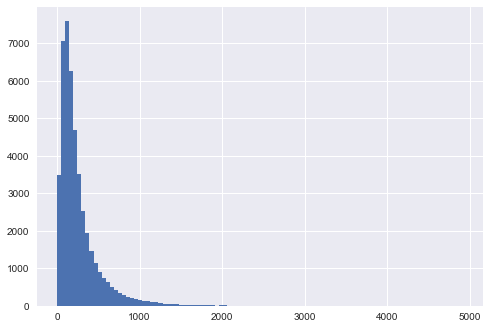

In [36]:
plt.hist((data.duration),bins=100)
plt.show()

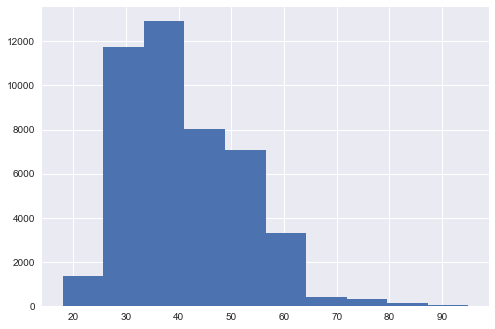

In [37]:
plt.hist(data.age,bins=10)
plt.show()

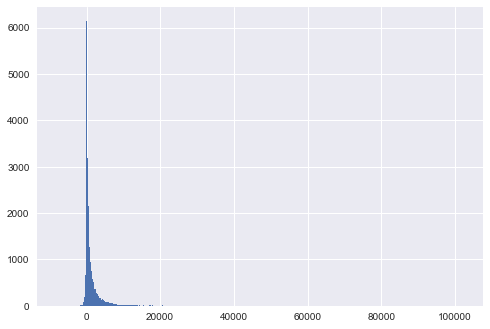

In [38]:
plt.hist(data.balance,bins=1000)
plt.show()

** Above, All the Histogram suggest that data is skewed towards left i.e. existence of skewness brings us to a point that we need to sample the data efficiently while classifiying the train_data and test_data !

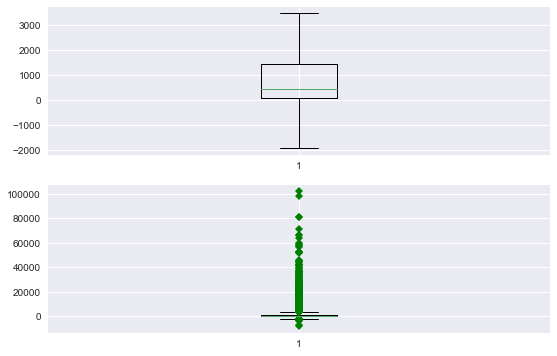

In [39]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(data.balance,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(data.balance,0,'gD')
plt.show()

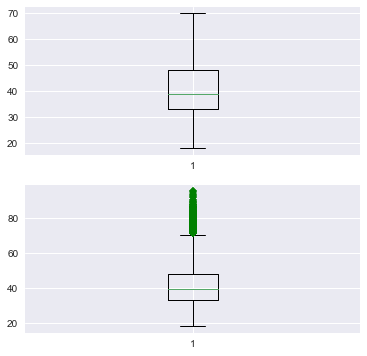

In [40]:
fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(211)
bp = ax.boxplot(data.age,0,'')
ax = fig.add_subplot(212)
bp = ax.boxplot(data.age,0,'gD')
plt.show()

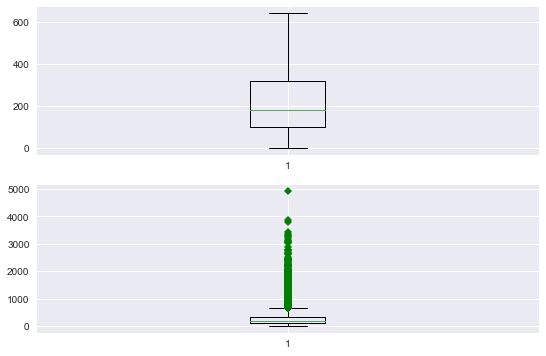

In [41]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(data.duration,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(data.duration,0,'gD')
plt.show()

#### Above boxplot suggest how the data is spread across the dataset


** Most of the data is lying above the 3rd quantile by multiplication factor of 1.5 i.e. by theortical aspect the data points are outlier for most of the data points.


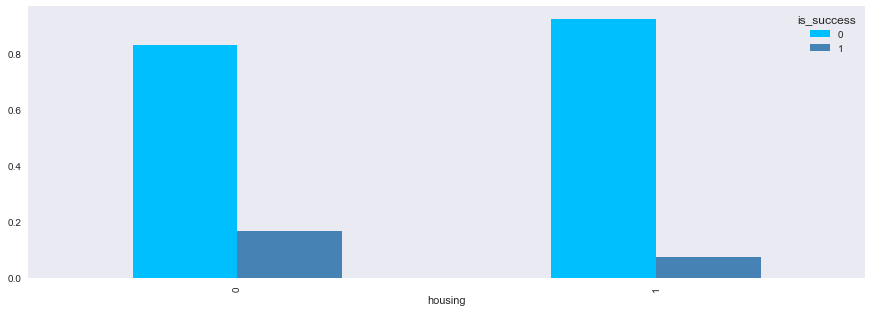

In [42]:
draw_data = pd.crosstab(data.housing, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

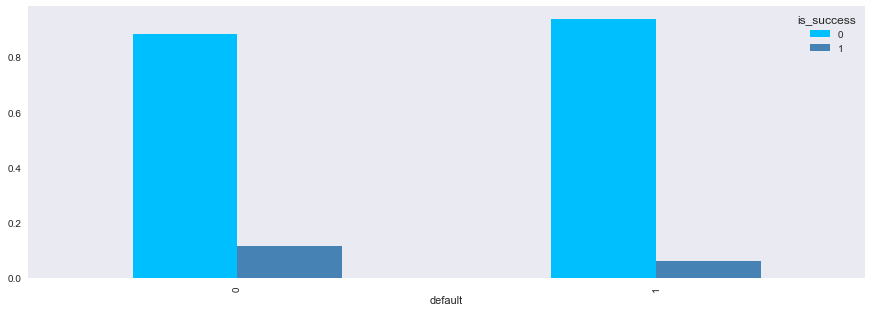

In [43]:
draw_data = pd.crosstab(data.default, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

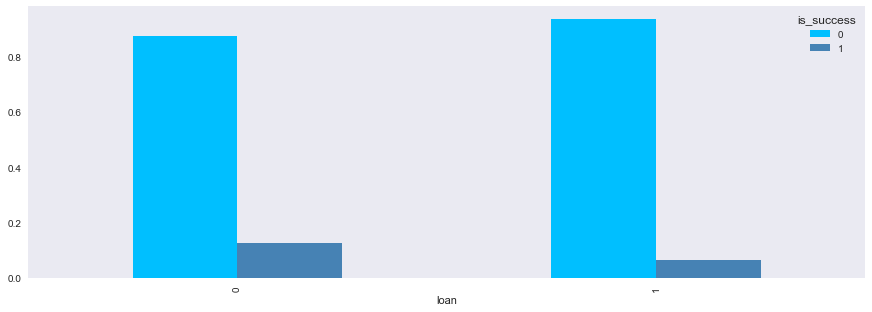

In [92]:
draw_data = pd.crosstab(data.loan, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

#### By looking at the bar graph, we can observe that Feature vs Label the data is wide spread i.e. we cannot predict completely based on feature alone.

### Feature Engineering 

** First, We can convert the duration from Seconds to Minutes and make categorical amount of 

In [44]:
data['duration'] = data['duration']/60
def age_(data):
    
    data.loc[(data['age'] <= 28) & (data['age'] >= 18),'age'] = 1
    data.loc[(data['age'] <= 39) & (data['age'] >= 29),'age'] = 2
    data.loc[(data['age'] <= 49) & (data['age'] >= 40),'age'] = 3
    data.loc[data['age'] >=40,'age'] = 4
    
    return data

data = age_(data)

def campaign_(data):
    
    data.loc[data['campaign'] == 1,'campaign'] = 1
    data.loc[(data['campaign'] >= 2) & (data['campaign'] <= 3),'campaign'] = 2
    data.loc[data['campaign'] >= 4,'campaign'] = 3
    
    return data

data = campaign_(data)

def duration_(data):
    
    data.loc[data['duration'] < 1,'duration'] = 0
    data.loc[(data['duration'] >= 1) & (data['duration'] <= 3),'duration'] = 1
    data.loc[(data['duration'] > 3) & (data['duration'] <= 5),'duration'] = 2
    data.loc[(data['duration'] > 5) & (data['duration'] <= 8),'duration'] = 3
    data.loc[data['duration'] > 8,'duration'] = 4
    
    return data

data = duration_(data)

def pdays_(data):
    
    data.loc[~data['pdays'] > 0 ,'pdays'] = 1
    data.loc[(data['pdays'] >= 1) & (data['pdays'] <=10) ,'pdays'] = 2
    data.loc[(data['pdays'] >= 11) & (data['pdays'] <=50) ,'pdays'] = 3
    data.loc[(data['pdays'] >= 51) & (data['pdays'] <=100), 'pdays'] = 4
    data.loc[data['pdays'] >= 101,'pdays'] = 5
    
    return data

data = pdays_(data)

def balance_(data):
    
    data.loc[data['balance']<0,'balance'] = -1
    data.loc[data['balance'] == 0,'balance'] = 0
    data.loc[(data['balance'] >= 1) & (data['balance'] <= 100),'balance'] = 2
    data.loc[(data['balance'] >= 101) & (data['balance'] <= 500),'balance'] = 3
    data.loc[(data['balance'] >= 501) & (data['balance'] <= 2000),'balance'] = 4
    data.loc[(data['balance'] >= 2001) & (data['balance'] <= 10000),'balance'] = 5
    data.loc[data['balance'] >= 10001,'balance'] = 6
    
    return data

def job_(data):
    
    data.loc[data['job'] == "management",'job'] = 1
    data.loc[data['job'] == "technician",'job'] = 2
    data.loc[data['job'] == "entrepreneur",'job'] = 3
    data.loc[data['job'] == "blue-collar",'job'] = 4
    data.loc[data['job'] == "retired",'job'] = 5
    data.loc[data['job'] == "admin.",'job'] = 6
    data.loc[data['job'] == "services",'job'] = 7
    data.loc[data['job'] == "self-employed",'job'] = 8
    data.loc[data['job'] == "unemployed",'job'] = 9
    data.loc[data['job'] == "student",'job'] = 10
    data.loc[data['job'] == "housemaid",'job'] = 11
    data.loc[data['job'] == "unknown",'job'] = 12
    
    return data

data = balance_(data)
data = job_(data)

print(data.balance.value_counts())
print(data.duration.value_counts())
print(data.pdays.value_counts())
print(data.campaign.value_counts())
print(data.age.value_counts())

 4    13045
 3    11190
 5     7672
 2     5195
-1     3766
 0     3514
 6      829
Name: balance, dtype: int64
1.0    18001
2.0    10277
3.0     6515
4.0     5759
0.0     4659
Name: duration, dtype: int64
-1    36954
 5     6820
 4     1179
 3      132
 2      126
Name: pdays, dtype: int64
2    18026
1    17544
3     9641
Name: campaign, dtype: int64
2    19274
3    11655
4    10194
1     4088
Name: age, dtype: int64


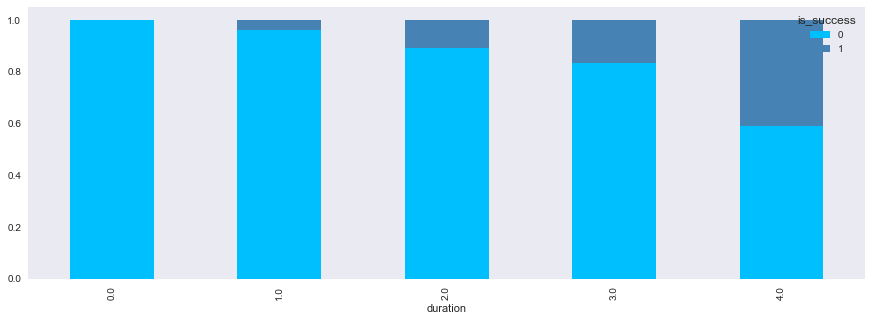

In [69]:
draw_data = pd.crosstab(data.duration, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

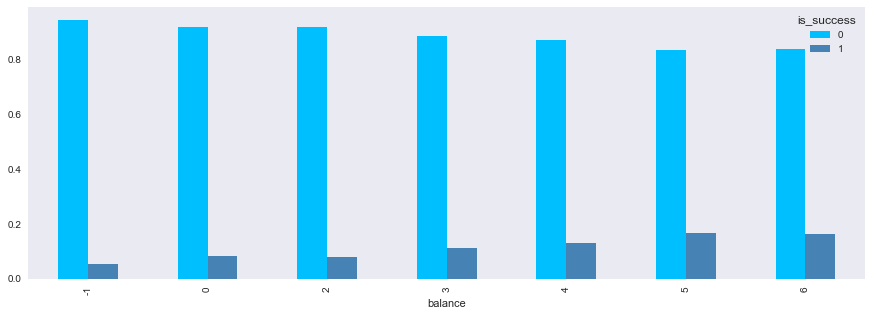

In [46]:
draw_data = pd.crosstab(data.balance, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

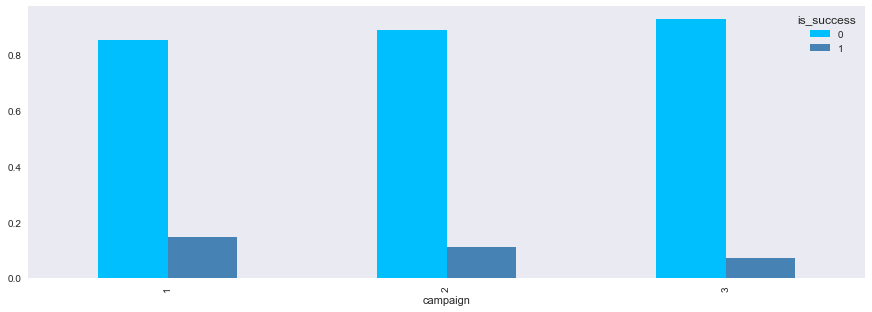

In [47]:
draw_data = pd.crosstab(data.campaign, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

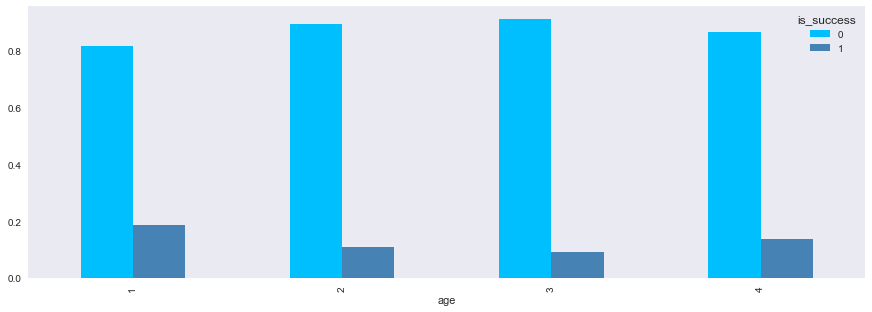

In [48]:
draw_data = pd.crosstab(data.age, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

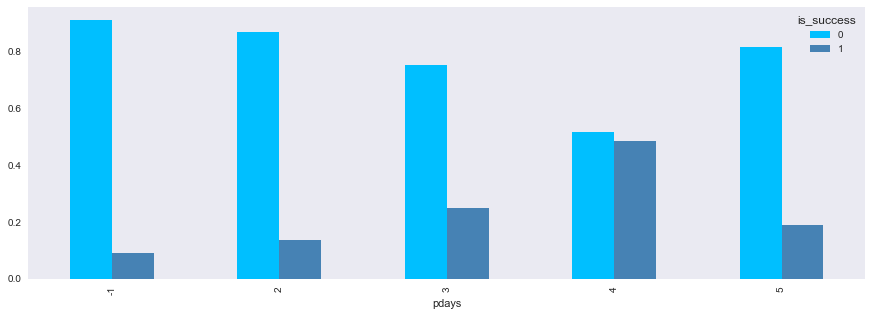

In [49]:
draw_data = pd.crosstab(data.pdays, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

In [50]:
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),'Adaptive Boosting Classifier':AdaBoostClassifier(),'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),'Logistic Regression':LogisticRegression(),'Random Forest Classifier': RandomForestClassifier(),'K Nearest Neighbour':KNeighborsClassifier(8)}#'Decision Tree Classifier':DecisionTreeClassifier(),'Gaussian Naive Bayes Classifier':GaussianNB(),'Support Vector Classifier':SVC(probability=True),}

In [82]:
data_y = pd.DataFrame(data['is_success'])
#print(data_y.columns)
data_X = data.drop('is_success',axis=1)
log_cols = ["Classifier", "Accuracy"]
metrics_cols = ['Precision Score','Recall Score','F1-Score']
log = pd.DataFrame(columns=log_cols)
metric = pd.DataFrame(columns=metrics_cols)

In [84]:
rs = StratifiedShuffleSplit(n_splits=3, test_size=0.1,random_state=42)
rs.get_n_splits(data_X,data_y)

3

In [85]:
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        f1_score = m.f1_score(y_test,y_out,average='macro')
        log_entry = pd.DataFrame([[Name,accuracy]], columns=log_cols)
        metric_entry = pd.DataFrame([[precision,recall,f1_score]], columns=metrics_cols)
        log = log.append(log_entry)
        metric = metric.append(metric_entry)

/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

                     Classifier  Accuracy
0  Gradient Boosting Classifier  0.891641
0  Gradient Boosting Classifier  0.891641
0  Gradient Boosting Classifier  0.898496
0  Adaptive Boosting Classifier  0.887439
0  Adaptive Boosting Classifier  0.886776
0  Adaptive Boosting Classifier  0.888103
0  Linear Discriminant Analysis  0.884785
0  Linear Discriminant Analysis  0.890093
0  Linear Discriminant Analysis  0.883016
0           Logistic Regression  0.888987
0           Logistic Regression  0.892083
0           Logistic Regression  0.886112
0      Random Forest Classifier  0.879478
0      Random Forest Classifier  0.879257
0      Random Forest Classifier  0.886555
0           K Nearest Neighbour  0.888103
0           K Nearest Neighbour  0.885007
0           K Nearest Neighbour  0.886333


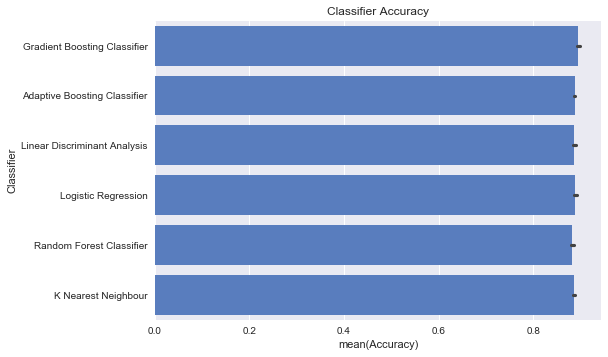

In [86]:
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")  
plt.show()

/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

                     Classifier  Accuracy
0  Gradient Boosting Classifier  0.891641
0  Gradient Boosting Classifier  0.891641
0  Gradient Boosting Classifier  0.898496
0  Adaptive Boosting Classifier  0.887439
0  Adaptive Boosting Classifier  0.886776
0  Adaptive Boosting Classifier  0.888103
0  Linear Discriminant Analysis  0.884785
0  Linear Discriminant Analysis  0.890093
0  Linear Discriminant Analysis  0.883016
0           Logistic Regression  0.888987
0           Logistic Regression  0.892083
0           Logistic Regression  0.886112
0      Random Forest Classifier  0.879478
0      Random Forest Classifier  0.879257
0      Random Forest Classifier  0.886555
0           K Nearest Neighbour  0.888103
0           K Nearest Neighbour  0.885007
0           K Nearest Neighbour  0.886333
0  Gradient Boosting Classifier  0.888545
0  Adaptive Boosting Classifier  0.881690
0  Linear Discriminant Analysis  0.879699
0           Logistic Regression  0.878815
0      Random Forest Classifier  0

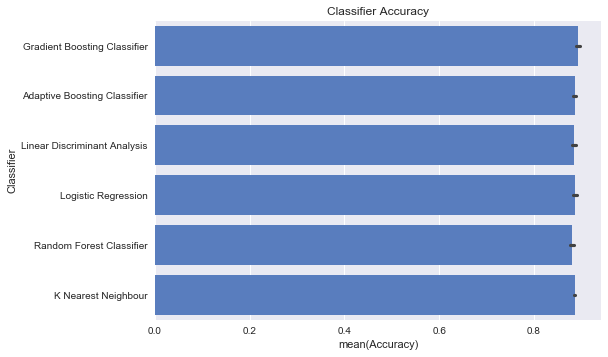

In [87]:
rs = ShuffleSplit(n_splits=1, test_size=0.1,random_state=42)
rs.get_n_splits(data_X,data_y)
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        f1_score = m.f1_score(y_test,y_out,average='macro')
        log_entry = pd.DataFrame([[Name,accuracy]], columns=log_cols)
        metric_entry = pd.DataFrame([[precision,recall,f1_score]], columns=metrics_cols)
        log = log.append(log_entry)
        metric = metric.append(metric_entry)
    
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")  
plt.show()

In [88]:
print(metric)

   Precision Score  Recall Score  F1-Score
0         0.748041      0.610658  0.642928
0         0.744786      0.620498  0.653024
0         0.772985      0.647339  0.684217
0         0.723185      0.625498  0.654509
0         0.720314      0.625123  0.653631
0         0.725372      0.648833  0.675575
0         0.711506      0.614156  0.641562
0         0.738843      0.609782  0.640881
0         0.704535      0.618074  0.644104
0         0.732937      0.607516  0.637705
0         0.754632      0.602709  0.634578
0         0.717572      0.608348  0.636602
0         0.693337      0.625910  0.648746
0         0.695164      0.638085  0.659095
0         0.719862      0.649596  0.674794
0         0.738373      0.572577  0.595505
0         0.713337      0.568364  0.588783
0         0.722349      0.575675  0.598905
0         0.754669      0.618119  0.651280
0         0.719142      0.624308  0.652282
0         0.710331      0.599101  0.625314
0         0.705427      0.584620  0.608269
0         0

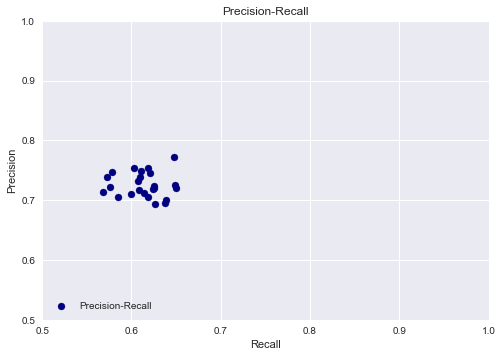

In [89]:
plt.scatter(metric['Recall Score'], metric['Precision Score'], color='navy',
         label='Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.5, 1.0])
plt.xlim([0.5, 1.0])
plt.title('Precision-Recall')
plt.legend(loc="lower left")
plt.show()

In [90]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_out,y_test)

0.74750114626318209

In [91]:
fpr, tpr, thresholds = m.roc_curve(y_out, y_test, pos_label=2)
m.auc(fpr, tpr)
0.75

/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


0.75

In [93]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,test_size=0.2)
for Name,classify in classifiers.items():
        cls = classify
        cls =cls.fit(X_train,y_train)
        y_out = cls.predict(X_test)
        accuracy = accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        f1_score = m.f1_score(y_test,y_out,average='macro')
        log_entry = pd.DataFrame([[Name,accuracy]], columns=log_cols)
        metric_entry = pd.DataFrame([[precision,recall,f1_score]], columns=metrics_cols)
        log = log.append(log_entry)
        metric = metric.append(metric_entry)
    
print(log)

/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

                     Classifier  Accuracy
0  Gradient Boosting Classifier  0.891641
0  Gradient Boosting Classifier  0.891641
0  Gradient Boosting Classifier  0.898496
0  Adaptive Boosting Classifier  0.887439
0  Adaptive Boosting Classifier  0.886776
0  Adaptive Boosting Classifier  0.888103
0  Linear Discriminant Analysis  0.884785
0  Linear Discriminant Analysis  0.890093
0  Linear Discriminant Analysis  0.883016
0           Logistic Regression  0.888987
0           Logistic Regression  0.892083
0           Logistic Regression  0.886112
0      Random Forest Classifier  0.879478
0      Random Forest Classifier  0.879257
0      Random Forest Classifier  0.886555
0           K Nearest Neighbour  0.888103
0           K Nearest Neighbour  0.885007
0           K Nearest Neighbour  0.886333
0  Gradient Boosting Classifier  0.888545
0  Adaptive Boosting Classifier  0.881690
0  Linear Discriminant Analysis  0.879699
0           Logistic Regression  0.878815
0      Random Forest Classifier  0